# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        13:12:51   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg_2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        13:15:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip_pct'>

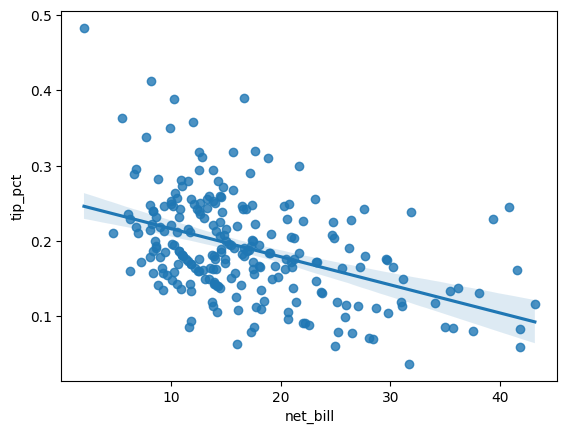

In [10]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [20]:
# Criar a coluna com o logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo de regressão
reg_log = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()

# Resumo do modelo
print(reg_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        13:39:56   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [15]:
# Adicionar o termo quadrático ao DataFrame
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar o modelo de regressão
reg_poly = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=tips).fit()

# Resumo do modelo
print(reg_poly.summary())



                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        13:25:35   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

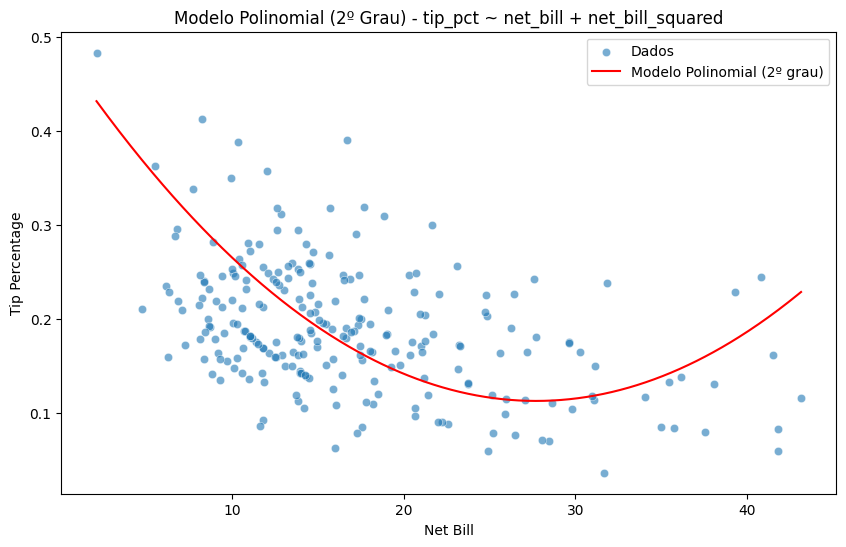

In [16]:

# Visualização do modelo ajustado
plt.figure(figsize=(10, 6))

# Gráfico de dispersão dos dados
sns.scatterplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < 0.5], alpha=0.6, label='Dados')

# Gerar uma curva do modelo polinomial
net_bill_range = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 500)
tip_pct_pred = reg_poly.params['Intercept'] + \
               reg_poly.params['net_bill'] * net_bill_range + \
               reg_poly.params['net_bill_squared'] * (net_bill_range ** 2)
plt.plot(net_bill_range, tip_pct_pred, color='red', label='Modelo Polinomial (2º grau)')

# Ajustar o gráfico
plt.title('Modelo Polinomial (2º Grau) - tip_pct ~ net_bill + net_bill_squared')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.legend()
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [17]:
# Remover valores de tip_pct menores ou iguais a zero (log não definido)
tips = tips[tips['tip_pct'] > 0]

# Criar a coluna do logaritmo de tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustar o modelo de log_tip_pct em função de net_bill
reg_log = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

# Ajustar o modelo de tip_pct em função de net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibir os resumos e os valores de R^2
print("Modelo com log(tip_pct):")
print(reg_log.summary())
print("\nModelo com tip_pct:")
print(reg_tip_pct.summary())

Modelo com log(tip_pct):
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        13:27:07   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [18]:
# Remover valores onde net_bill ou tip_pct são menores ou iguais a zero (log não definido)
tips = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)]

# Criar as colunas do logaritmo de tip_pct e net_bill
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo de log_tip_pct em função de log_net_bill
reg_log_log = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

# Ajustar o modelo de tip_pct em função de net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibir os resumos e os valores de R^2
print("Modelo com log(tip_pct) ~ log(net_bill):")
print(reg_log_log.summary())
print("\nModelo com tip_pct ~ net_bill:")
print(reg_tip_pct.summary())

Modelo com log(tip_pct) ~ log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        13:28:07   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interce

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
Dos novos modelos log de tip_pct em função do log de net_bill seria o melhor. Mas não se compara ao primeiro ainda.